# Stock Price Prediction

## Time Series Plots

In [1]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
#url = "https://www.quandl.com/api/v3/datasets/WIKI/AAPL.csv"
df = pd.read_csv('HistoricalQuotes.csv')

In [3]:
df = df.drop(0, axis = 0)

In [4]:
df = df.reset_index()

In [5]:
df.head(1)

,index,date,close,volume,open,high,low
0,1,2018/12/03,184.82,40537700.0000,184.46,184.94,181.21


In [6]:
# Lets convert the dataframe index into the date series
#df = df.iloc[::-1]
df['Date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.sort_values(by=['Date'], ascending=[True])
df.set_index('Date', inplace=True)

## Fill in the Empty data points using forward fill

In [7]:
df.head(10)

,index,date,close,volume,open,high,low
Date,,,,,,,
2008-12-03,2518,2008/12/03,13.7000,334651410.0000,12.7714,13.7471,12.6857
2008-12-04,2517,2008/12/04,13.0586,272823192.0000,13.4900,13.6014,12.7229
2008-12-05,2516,2008/12/05,13.4286,260894768.0000,12.9071,13.4986,12.6943
2008-12-08,2515,2008/12/08,14.2457,295986969.0000,13.8971,14.4000,13.6857
2008-12-09,2514,2008/12/09,14.2943,300828240.0000,14.0057,14.8000,13.8871
2008-12-10,2513,2008/12/10,14.0300,234464370.0000,13.9814,14.2129,13.7857
2008-12-11,2512,2008/12/11,13.5714,260101878.0000,13.9071,14.4629,13.5471
2008-12-12,2511,2008/12/12,14.0386,260267638.0000,13.2571,14.1429,13.2186
2008-12-15,2510,2008/12/15,13.5357,222574447.0000,13.7129,13.7443,13.2857


In [8]:
df = df.resample('D').ffill().reset_index()
#df = df.sort_values(by = df['Date'],ascending = True)

In [11]:
df.head(7) # Check if weekend values are filled with the value at the end of Friday

,Date,index,date,close,volume,open,high,low
0,2008-12-03,2518,2008/12/03,13.7000,334651410.0000,12.7714,13.7471,12.6857
1,2008-12-04,2517,2008/12/04,13.0586,272823192.0000,13.4900,13.6014,12.7229
2,2008-12-05,2516,2008/12/05,13.4286,260894768.0000,12.9071,13.4986,12.6943
3,2008-12-06,2516,2008/12/05,13.4286,260894768.0000,12.9071,13.4986,12.6943
4,2008-12-07,2516,2008/12/05,13.4286,260894768.0000,12.9071,13.4986,12.6943
5,2008-12-08,2515,2008/12/08,14.2457,295986969.0000,13.8971,14.4000,13.6857
6,2008-12-09,2514,2008/12/09,14.2943,300828240.0000,14.0057,14.8000,13.8871


In [14]:
df.info() # Check is the volume data is numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 8 columns):
Date      3653 non-null datetime64[ns]
index     3653 non-null int64
date      3653 non-null object
close     3653 non-null float64
volume    3653 non-null object
open      3653 non-null float64
high      3653 non-null float64
low       3653 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 228.4+ KB


In [15]:
# Convert the volume data into numeric data
df['volume'] = pd.to_numeric(df['volume'])
df.info()

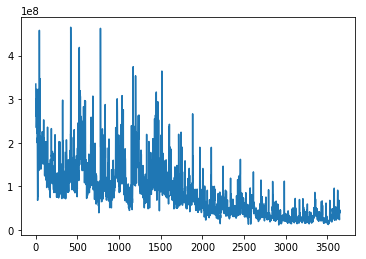

In [17]:
# The volume data is numeric
df.volume.plot()

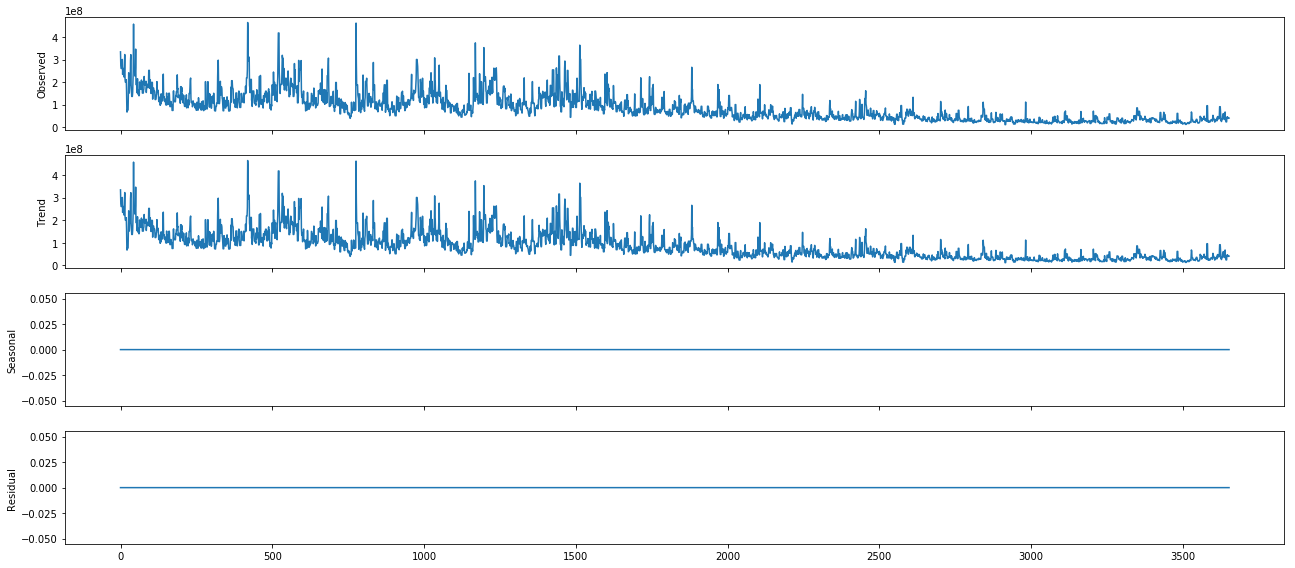

In [29]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df.volume,freq = 1, model='additive')
decomposition.plot()
plt.show()

Why is the trend the only component. This should not happen and is not correct.
Lets try to convert the dail data into monthly may be seasonality is hard to discover in the daily data

In [33]:
df = df.set_index('date')

In [36]:
df.index = pd.to_datetime(df.index)

In [41]:
dfm = df.volume.resample('MS').mean()

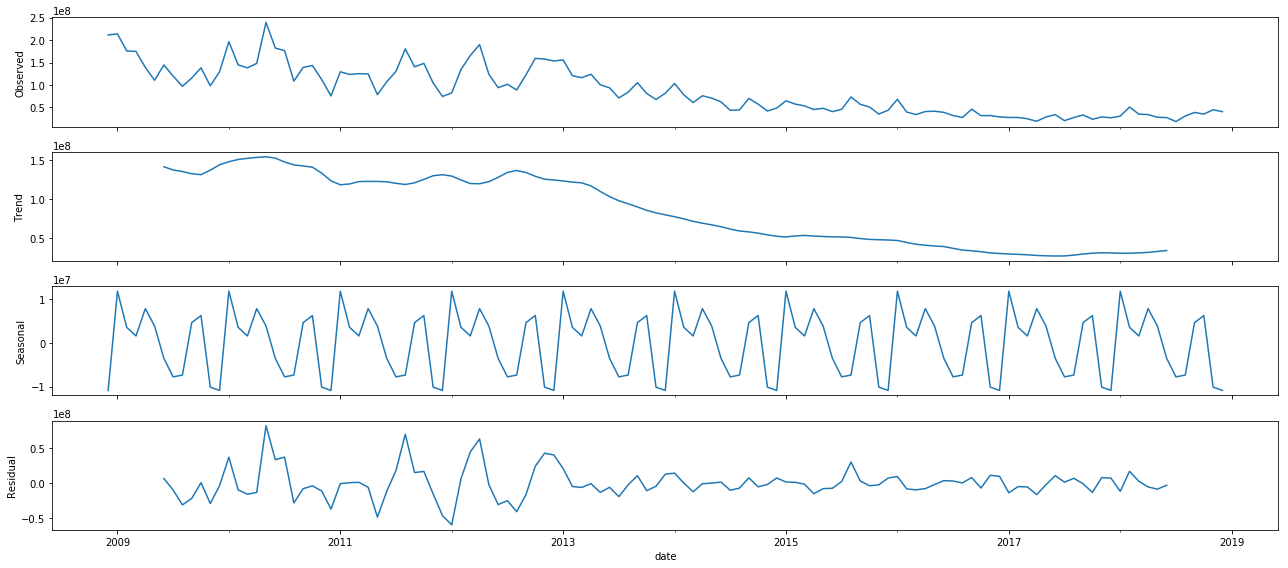

In [42]:
decomposition = sm.tsa.seasonal_decompose(dfm, model='additive')
decomposition.plot()
plt.show()

This worked. Now lets try time series forecasting using ARIMA model

In [44]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [63]:
aiclist = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dfm,order=param,seasonal_order=param_seasonal,
                                            enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA',param,' x ',param_seasonal,'12 - AIC:',results.aic)
            aiclist.append(results.aic)
        except:
            continue

/Users/pardeepkumar/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA (0, 0, 0)  x  (0, 0, 0, 12) 12 - AIC: 4763.342132974965
ARIMA (0, 0, 0)  x  (0, 0, 1, 12) 12 - AIC: 4182.821581900205
ARIMA (0, 0, 0)  x  (0, 1, 0, 12) 12 - AIC: 4085.6573778579077
ARIMA (0, 0, 0)  x  (0, 1, 1, 12) 12 - AIC: 3624.4332017179936
ARIMA (0, 0, 0)  x  (1, 0, 0, 12) 12 - AIC: 4101.958412870569
ARIMA (0, 0, 0)  x  (1, 0, 1, 12) 12 - AIC: 4082.4142008220742
ARIMA (0, 0, 0)  x  (1, 1, 0, 12) 12 - AIC: 3661.4569737319107
ARIMA (0, 0, 0)  x  (1, 1, 1, 12) 12 - AIC: 3618.8831589579636
ARIMA (0, 0, 1)  x  (0, 0, 0, 12) 12 - AIC: 4640.409708636024
ARIMA (0, 0, 1)  x  (0, 0, 1, 12) 12 - AIC: 4154.793545920222
ARIMA (0, 0, 1)  x  (0, 1, 0, 12) 12 - AIC: 4018.9291813408936
ARIMA (0, 0, 1)  x  (0, 1, 1, 12) 12 - AIC: 3539.7178955904947
ARIMA (0, 0, 1)  x  (1, 0, 0, 12) 12 - AIC: 4220.714066250358
ARIMA (0, 0, 1)  x  (1, 0, 1, 12) 12 - AIC: 4144.804828902131
ARIMA (0, 0, 1)  x  (1, 1, 0, 12) 12 - AIC: 3626.099085960384
ARIMA (0, 0, 1)  x  (1, 1, 1, 12) 12 - AIC: 3541.7175961808075


Minimum is achieved at ARIMA (1, 1, 1)  x  (0, 1, 1, 12) 12 - AIC: 3490.9468386065664

In [67]:
mod = sm.tsa.statespace.SARIMAX(dfm,
                                order=(1, 1, 1),
                                seasonal_order=(0,1,1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4853      0.192      2.532      0.011       0.110       0.861
ma.L1         -0.7389      0.126     -5.871      0.000      -0.986      -0.492
ma.S.L12      -0.5801      0.066     -8.772      0.000      -0.710      -0.451
sigma2      1.229e+15        nan        nan        nan         nan         nan


/Users/pardeepkumar/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/pardeepkumar/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/pardeepkumar/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/pardeepkumar/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


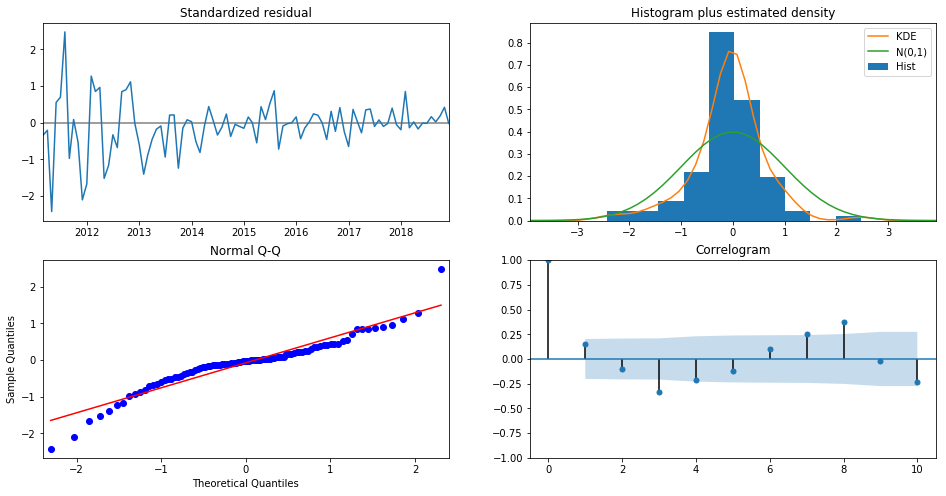

In [68]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()